<a href="https://colab.research.google.com/github/Niki9001/MachineLearningTeach/blob/main/honeyPriceLinar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('/honey_purity_dataset.csv')

In [30]:
df.isnull().sum()

CS                 0
Density            0
WC                 0
pH                 0
EC                 0
F                  0
G                  0
Pollen_analysis    0
Viscosity          0
Purity             0
Price              0
dtype: int64

In [31]:
df.head()

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,Blueberry,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,Alfalfa,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,Chestnut,6883.60,0.66,639.64
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,Blueberry,7167.56,1.00,946.46
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,Alfalfa,5125.44,1.00,432.62


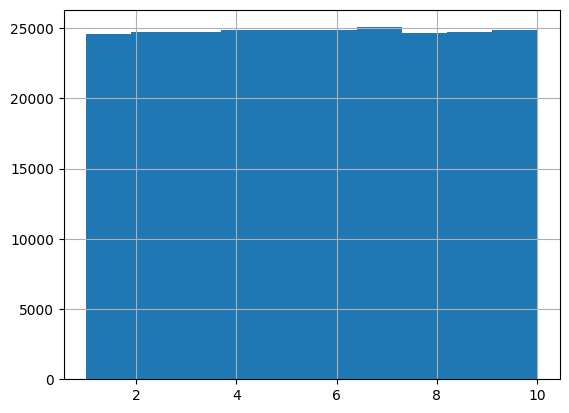

In [32]:
df['CS'].hist(bins=10)
plt.show()

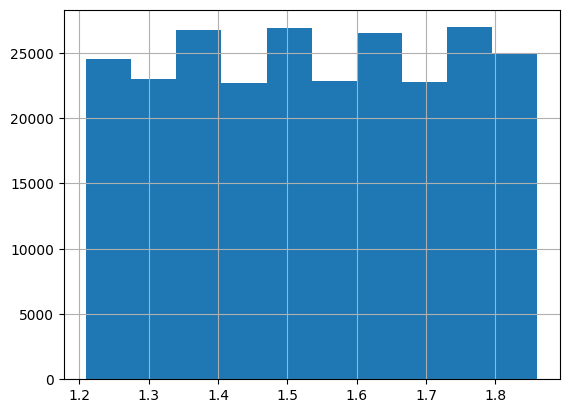

In [33]:
df['Density'].hist(bins=10)
plt.show()

In [34]:
one_hot_encoded = pd.get_dummies(df['Pollen_analysis'], prefix='Pollen_analysis')

# 查看转换后的DataFrame
one_hot_encoded.head()

# 如果您想要将one-hot编码的结果合并回原始的DataFrame，可以使用concat方法
df = pd.concat([df, one_hot_encoded], axis=1)

# 查看合并后的DataFrame
df.head()

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,...,Pollen_analysis_Heather,Pollen_analysis_Lavender,Pollen_analysis_Manuka,Pollen_analysis_Orange Blossom,Pollen_analysis_Rosemary,Pollen_analysis_Sage,Pollen_analysis_Sunflower,Pollen_analysis_Thyme,Pollen_analysis_Tupelo,Pollen_analysis_Wildflower
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,Blueberry,4844.50,0.68,...,0,0,0,0,0,0,0,0,0,0
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,Alfalfa,6689.02,0.89,...,0,0,0,0,0,0,0,0,0,0
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,Chestnut,6883.60,0.66,...,0,0,0,0,0,0,0,0,0,0
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,Blueberry,7167.56,1.00,...,0,0,0,0,0,0,0,0,0,0
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,Alfalfa,5125.44,1.00,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df.head()

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,...,Pollen_analysis_Heather,Pollen_analysis_Lavender,Pollen_analysis_Manuka,Pollen_analysis_Orange Blossom,Pollen_analysis_Rosemary,Pollen_analysis_Sage,Pollen_analysis_Sunflower,Pollen_analysis_Thyme,Pollen_analysis_Tupelo,Pollen_analysis_Wildflower
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,Blueberry,4844.50,0.68,...,0,0,0,0,0,0,0,0,0,0
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,Alfalfa,6689.02,0.89,...,0,0,0,0,0,0,0,0,0,0
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,Chestnut,6883.60,0.66,...,0,0,0,0,0,0,0,0,0,0
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,Blueberry,7167.56,1.00,...,0,0,0,0,0,0,0,0,0,0
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,Alfalfa,5125.44,1.00,...,0,0,0,0,0,0,0,0,0,0


In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

# 注意.reshape(-1, 1)是因为scaler需要2D数组
df['CS'] = scaler.fit_transform(df['CS'].values.reshape(-1, 1))
df['Density'] = scaler.fit_transform(df['Density'].values.reshape(-1, 1))
df['WC'] = scaler.fit_transform(df['WC'].values.reshape(-1, 1))
df['pH'] = scaler.fit_transform(df['pH'].values.reshape(-1, 1))
df['EC'] = scaler.fit_transform(df['EC'].values.reshape(-1, 1))
df['F'] = scaler.fit_transform(df['F'].values.reshape(-1, 1))
df['G'] = scaler.fit_transform(df['G'].values.reshape(-1, 1))
df['Viscosity'] = scaler.fit_transform(df['Viscosity'].values.reshape(-1, 1))
df['Price'] = scaler.fit_transform(df['Price'].values.reshape(-1, 1))


# 查看归一化后的数据
df.head()

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,...,Pollen_analysis_Heather,Pollen_analysis_Lavender,Pollen_analysis_Manuka,Pollen_analysis_Orange Blossom,Pollen_analysis_Rosemary,Pollen_analysis_Sage,Pollen_analysis_Sunflower,Pollen_analysis_Thyme,Pollen_analysis_Tupelo,Pollen_analysis_Wildflower
0,0.201111,0.830769,0.849231,0.758,0.30,0.634000,0.5452,Blueberry,0.393468,0.68,...,0,0,0,0,0,0,0,0,0,0
1,0.941111,0.938462,0.423077,0.940,0.05,0.605000,0.5764,Alfalfa,0.610473,0.89,...,0,0,0,0,0,0,0,0,0,0
2,0.401111,0.969231,0.901538,0.962,0.50,0.249000,0.5744,Chestnut,0.633365,0.66,...,0,0,0,0,0,0,0,0,0,0
3,0.085556,0.292308,0.354615,0.302,0.40,0.384000,0.3260,Blueberry,0.666772,1.00,...,0,0,0,0,0,0,0,0,0,0
4,0.567778,0.061538,0.586923,0.464,1.00,0.321667,0.9008,Alfalfa,0.426520,1.00,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df.drop(['Pollen_analysis'], axis=1, inplace=True)
df.head()

,CS,Density,WC,pH,EC,F,G,Viscosity,Purity,Price,...,Pollen_analysis_Heather,Pollen_analysis_Lavender,Pollen_analysis_Manuka,Pollen_analysis_Orange Blossom,Pollen_analysis_Rosemary,Pollen_analysis_Sage,Pollen_analysis_Sunflower,Pollen_analysis_Thyme,Pollen_analysis_Tupelo,Pollen_analysis_Wildflower
0,0.201111,0.830769,0.849231,0.758,0.30,0.634000,0.5452,0.393468,0.68,0.609125,...,0,0,0,0,0,0,0,0,0,0
1,0.941111,0.938462,0.423077,0.940,0.05,0.605000,0.5764,0.610473,0.89,0.303230,...,0,0,0,0,0,0,0,0,0,0
2,0.401111,0.969231,0.901538,0.962,0.50,0.249000,0.5744,0.633365,0.66,0.602521,...,0,0,0,0,0,0,0,0,0,0
3,0.085556,0.292308,0.354615,0.302,0.40,0.384000,0.3260,0.666772,1.00,0.964350,...,0,0,0,0,0,0,0,0,0,0
4,0.567778,0.061538,0.586923,0.464,1.00,0.321667,0.9008,0.426520,1.00,0.358385,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# 选择特征和目标变量
X = df.drop('Price', axis=1)  # 特征变量
y = df['Price']  # 目标变量

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 将数据分成训练集和测试集<ctrl63>
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 构建模型
model = LinearRegression()

# 训练模型
model.fit(X_train, y_train)

# 预测测试集
y_pred = model.predict(X_test)


# 评估模型
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)

print(f'RMSE: {rmse}')

Mean Squared Error: 0.0017434283318057825
RMSE: 0.04175438098937383


Validation

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np


X = df.drop('Price', axis=1)  # 特征变量
y = df['Price']  # 目标变量


# 创建线性回归模型实例
model = LinearRegression()

# 执行5折交叉验证
# cv参数控制交叉验证的折数
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# 打印每折的MSE
print("MSE scores for each fold:", -scores)

# 计算MSE的平均值和标准差
print("Average MSE:", -np.mean(scores))
print("Standard deviation of MSE:", np.std(scores))


MSE scores for each fold: [0.00175479 0.00172865 0.00172624 0.00175651 0.0017136 ]
Average MSE: 0.0017359550244024431
Standard deviation of MSE: 1.688053595076549e-05


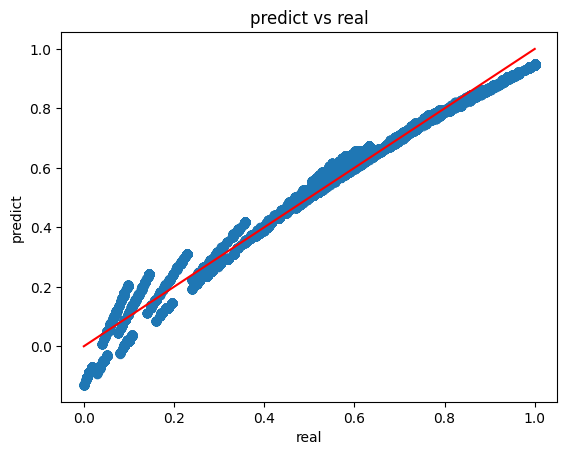

In [43]:
import matplotlib.pyplot as plt

# 绘制实际值与预测值的散点图
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('predict vs real')
plt.xlabel('real')
plt.ylabel('predict')

# 绘制理想情况下的线性关系线（45度线）
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # 理想线

plt.show()


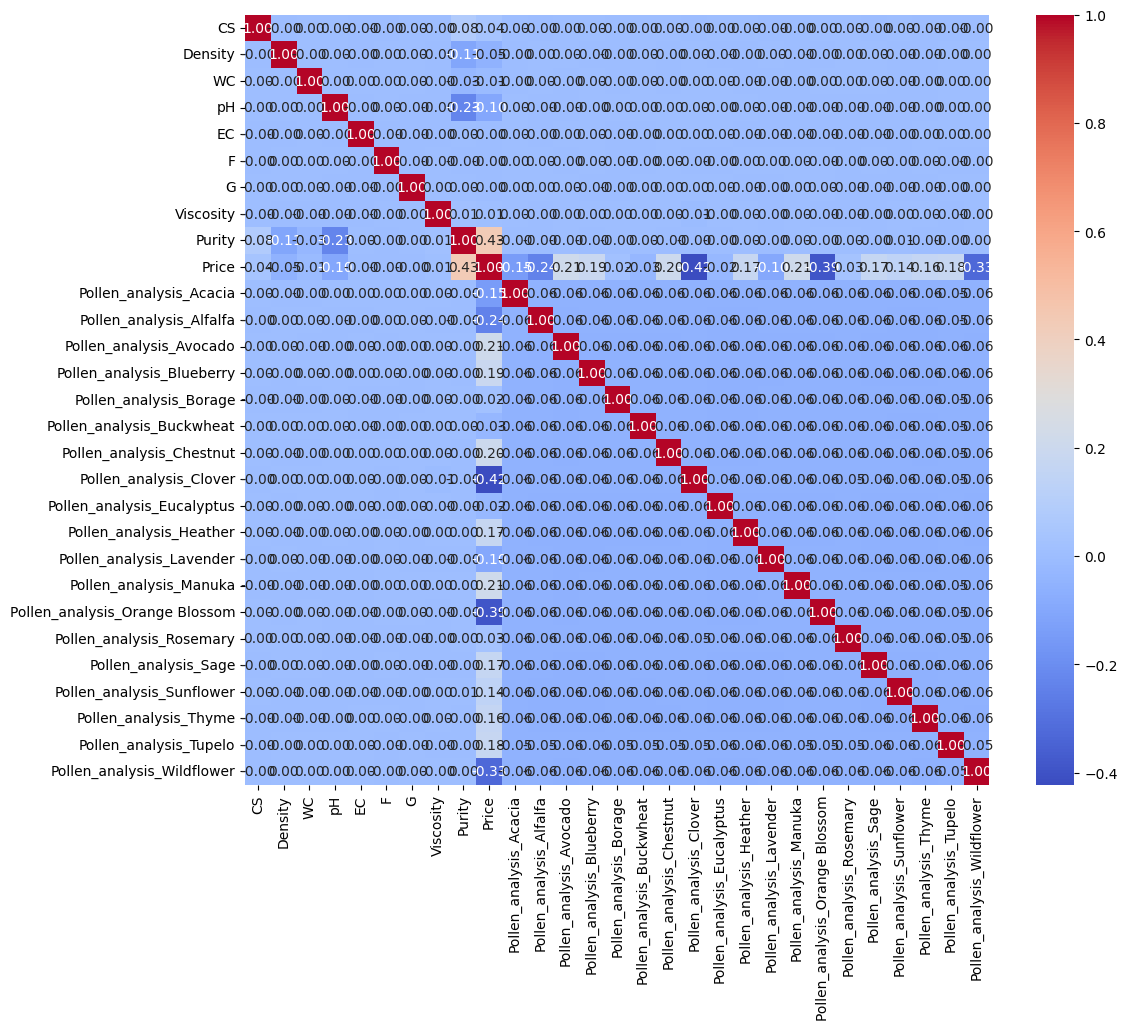

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# 计算相关性矩阵
corr_matrix = df.corr()

# 使用 seaborn 绘制热图来可视化相关性矩阵
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


In [45]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df.drop('Price', axis=1)  # 特征变量
y = df['Price']  # 目标变量

# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 实例化XGBoost回归器
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

# 训练模型
xg_reg.fit(X_train, y_train)

# 预测测试集
y_pred = xg_reg.predict(X_test)

# 计算均方误差
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("xgb_RMSE: %f" % (xgb_rmse))


xgb_RMSE: 0.209892


In [46]:
# 计算平均价格
average_price = y_test.mean()

# 计算Scatter Index
scatter_index = rmse / average_price

# 输出SI值
print(f'Scatter Index: {scatter_index}')


Scatter Index: 0.07617980779587986


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 假设X和y已经被定义
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练线性回归模型
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# 使用线性回归模型进行预测
y_pred_linear = linear_model.predict(X_test)


In [52]:
import xgboost as xgb

# 训练XGBoost模型
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xgb_model.fit(X_train, y_train)

# 使用XGBoost模型进行预测
y_pred_xgb = xgb_model.predict(X_test)


In [53]:
from sklearn.metrics import r2_score

# 计算线性回归模型的R²值
r2_linear = r2_score(y_test, y_pred_linear)

# 计算XGBoost模型的R²值
r2_xgb = r2_score(y_test,y_pred_linear)

print(f'线性回归模型的R²值: {r2_linear}')
print(f'XGBoost模型的R²值: {r2_xgb}')


线性回归模型的R²值: 0.9769632843276875
XGBoost模型的R²值: 0.9769632843276875


In [47]:
# 计算平均价格
average_price = y_test.mean()

# 计算Scatter Index
xgb_scatter_index = xgb_rmse / average_price

# 输出SI值
print(f'XGB Scatter Index: {xgb_scatter_index}')


XGB Scatter Index: 0.3829432760009534
